In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [5]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/amitjain/anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [7]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/amitjain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitjain/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
data_path = 'data/'

In [19]:
data_filename = sorted(glob.glob(data_path+"/*.txt"))

In [20]:
print(data_filename)

['data/document1.txt', 'data/document2.txt']


In [22]:
corpus_raw = u""
for data_file in data_filename:
    with codecs.open(data_file, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Corpus is now 2571 characters long

Corpus is now 4943 characters long



In [23]:
print(corpus_raw)

Born and raised in the Austrian Empire, Tesla received an advanced education in engineering and physics in the 1870s and gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. He emigrated to the United States in 1884, where he would become a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His alternating current (AC) induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable amount of money and became the cornerstone of the polyphase system which that company would eventually market.

Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/

In [24]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [25]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [27]:
print(len(raw_sentences))

32


In [32]:
raw_sentences[4]

'His alternating current (AC) induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable amount of money and became the cornerstone of the polyphase system which that company would eventually market.'

In [33]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [34]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [36]:
print(len(sentences))

32


In [37]:
print(sentences[4])

['His', 'alternating', 'current', 'AC', 'induction', 'motor', 'and', 'related', 'polyphase', 'AC', 'patents', 'licensed', 'by', 'Westinghouse', 'Electric', 'in', 'earned', 'him', 'a', 'considerable', 'amount', 'of', 'money', 'and', 'became', 'the', 'cornerstone', 'of', 'the', 'polyphase', 'system', 'which', 'that', 'company', 'would', 'eventually', 'market']


In [39]:
total_token = sum([len(sen) for sen in sentences])

In [40]:
print(total_token)

802


In [44]:
num_features = 20
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 5
downsampling = 1e-3
seed = 1

In [45]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [47]:
thrones2vec.build_vocab(sentences)

2017-08-19 16:43:10,051 : INFO : collecting all words and their counts
2017-08-19 16:43:10,052 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-08-19 16:43:10,053 : INFO : collected 388 word types from a corpus of 802 raw words and 32 sentences
2017-08-19 16:43:10,054 : INFO : Loading a fresh vocabulary
2017-08-19 16:43:10,054 : INFO : min_count=3 retains 47 unique words (12% of original 388, drops 341)
2017-08-19 16:43:10,055 : INFO : min_count=3 leaves 406 word corpus (50% of original 802, drops 396)
2017-08-19 16:43:10,056 : INFO : deleting the raw counts dictionary of 388 items
2017-08-19 16:43:10,057 : INFO : sample=0.001 downsamples 47 most-common words
2017-08-19 16:43:10,058 : INFO : downsampling leaves estimated 98 word corpus (24.1% of prior 406)
2017-08-19 16:43:10,058 : INFO : estimated required memory for 47 words and 20 dimensions: 31020 bytes
2017-08-19 16:43:10,059 : INFO : resetting layer weights


In [50]:
thrones2vec.train(sentences,total_words=total_token,epochs=1)

2017-08-19 16:45:28,433 : INFO : training model with 8 workers on 47 vocabulary and 20 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2017-08-19 16:45:28,437 : INFO : worker thread finished; awaiting finish of 7 more threads
2017-08-19 16:45:28,438 : INFO : worker thread finished; awaiting finish of 6 more threads
2017-08-19 16:45:28,439 : INFO : worker thread finished; awaiting finish of 5 more threads
2017-08-19 16:45:28,440 : INFO : worker thread finished; awaiting finish of 4 more threads
2017-08-19 16:45:28,440 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-08-19 16:45:28,441 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-08-19 16:45:28,441 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-08-19 16:45:28,442 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-08-19 16:45:28,442 : INFO : training on 802 raw words (93 effective words) took 0.0s, 15752 effective words/s
2017-08-19 

93

In [60]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [61]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2017-08-19 16:47:58,938 : INFO : saving Word2Vec object under trained/thrones2vec.w2v, separately None
2017-08-19 16:47:58,939 : INFO : not storing attribute syn0norm
2017-08-19 16:47:58,940 : INFO : not storing attribute cum_table
2017-08-19 16:47:58,942 : INFO : saved trained/thrones2vec.w2v


In [65]:
thrones2vec.most_similar('Jobs')

[('Apple', 0.587634265422821),
 ('of', 0.5178271532058716),
 ('and', 0.5080441832542419),
 ('development', 0.4029581844806671),
 ('develop', 0.33027467131614685),
 ('him', 0.32553452253341675),
 ('market', 0.3158106803894043),
 ('in', 0.2835238575935364),
 ('power', 0.2821364998817444),
 ('Wozniak', 0.27782559394836426)]

In [66]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [69]:
nearest_similarity_cosmul("Jobs", "power", "Tesla")

Jobs is related to power, as on is related to Tesla


'on'

In [72]:
thrones2vec.syn1neg

array([[  1.73982012e-03,   2.32515298e-03,  -3.83493910e-03,
         -5.37546445e-03,  -1.10983115e-03,   2.55719828e-03,
          5.53185120e-03,  -2.78962567e-03,  -3.10619408e-03,
          6.68094261e-04,  -1.53715524e-03,  -6.00405084e-03,
         -3.18486104e-03,  -1.65418978e-03,  -5.09773009e-03,
          2.36104475e-03,  -1.98247051e-03,   3.41779762e-03,
          3.48823494e-03,  -4.23704181e-03],
       [ -3.77409137e-03,   1.21668912e-03,  -2.90166540e-03,
         -7.36073265e-03,   3.48343514e-03,   1.95635529e-03,
          1.09643454e-03,  -8.18816130e-04,  -3.46780661e-03,
         -7.18098599e-04,  -6.61899336e-04,  -1.01176575e-02,
         -4.17533843e-03,  -2.20490177e-03,  -9.81093943e-03,
          4.31618933e-03,  -2.62846309e-03,   2.30419310e-03,
          1.49738300e-03,  -8.10461026e-03],
       [ -1.22028391e-03,  -6.16457313e-04,   2.45784642e-04,
         -4.15531360e-03,   7.61785413e-05,   8.02046619e-03,
          2.28878041e-03,   3.22275423e-03

In [73]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [75]:
all_word_vectors_matrix_2d = tsne.fit_transform(thrones2vec.syn1neg)

In [79]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [81]:
points.head(20)

,word,x,y
0,and,-46.660053,8.984913
1,in,-48.960934,1.284148
2,the,-43.284119,-7.181541
3,Tesla,-24.036070,-2.085422
4,an,-8.661366,0.115956
5,s,-34.630875,0.144557
6,at,10.023919,-9.675728
7,power,-15.976613,16.407305
8,industry,22.593653,-24.862274
9,He,-12.516855,7.988799


In [94]:
sns.set_context("poster")

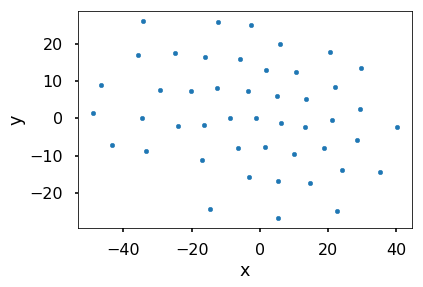

In [95]:
points.plot.scatter("x", "y")

In [96]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [97]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

ValueError: scatter requires x column to be numeric